In [1]:
### Imports

import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

/Users/louissanna/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
# Constants

num_words = 10_000

In [6]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.reuters.load_data(num_words=num_words)

2110848/2110848 [==============================] - 0s 0us/step


In [7]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [8]:
train_data.shape

(8982,)

In [9]:
train_labels[:10]

array([ 3,  4,  3,  4,  4,  4,  4,  3,  3, 16])

In [14]:
index_by_word = tf.keras.datasets.reuters.get_word_index()
word_by_index = { index: word for word, index in index_by_word.items() }


{10996: 'mdbl',
 16260: 'fawc',
 12089: 'degussa',
 8803: 'woods',
 13796: 'hanging',
 20672: 'localized',
 20673: 'sation',
 20675: 'chanthaburi',
 10997: 'refunding',
 8804: 'hermann',
 20676: 'passsengers',
 20677: 'stipulate',
 8352: 'heublein',
 20713: 'screaming',
 16261: 'tcby',
 185: 'four',
 1642: 'grains',
 20680: 'broiler',
 12090: 'wooden',
 1220: 'wednesday',
 13797: 'highveld',
 7593: 'duffour',
 20681: '0053',
 3914: 'elections',
 2563: '270',
 3551: '271',
 5113: '272',
 3552: '273',
 3400: '274',
 7975: 'rudman',
 3401: '276',
 3478: '277',
 3632: '278',
 4309: '279',
 9381: 'dormancy',
 7247: 'errors',
 3086: 'deferred',
 20683: 'sptnd',
 8805: 'cooking',
 20684: 'stratabit',
 16262: 'designing',
 20685: 'metalurgicos',
 13798: 'databank',
 20686: '300er',
 20687: 'shocks',
 7972: 'nawg',
 20688: 'tnta',
 20689: 'perforations',
 2891: 'affiliates',
 20690: '27p',
 16263: 'ching',
 595: 'china',
 16264: 'wagyu',
 3189: 'affiliated',
 16265: 'chino',
 16266: 'chinh',
 2

In [19]:
" ".join(list(map(lambda index: word_by_index.get(index - 3,"?"),train_data[0])))

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [69]:
word_by_index.get(train_labels[0] - 3,"?")

'?'

In [26]:
def vectorize_sequences(sequences, dimensions=num_words):
    result = np.zeros(shape=(len(sequences), dimensions), dtype="float32")
    for i, sequence in enumerate(sequences):
        for index in sequence:
            result[i][index] = 1.0 
    return result

In [28]:
train_data_vectors = vectorize_sequences(train_data)
train_labels_vectors = tf.keras.utils.to_categorical(train_labels)
train_data_vectors[0]

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

In [29]:
train_labels_vectors[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [70]:
model = tf.keras.Sequential([tf.keras.layers.Dense(64, activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.002)),
                           tf.keras.layers.DropOut(0.2),
                             tf.keras.layers.Dense(64,activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.002)),
                             tf.keras.layers.DropOut(0.2),
                            tf.keras.layers.Dense(len(train_labels_vectors[0]), activation="softmax")]
                           )

AttributeError: module 'keras.api._v2.keras.layers' has no attribute 'DropOut'

In [71]:
model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [67]:
model.build(train_data_vectors.shape)
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (8982, 64)                640064    
                                                                 
 dense_21 (Dense)            (8982, 64)                4160      
                                                                 
 dense_22 (Dense)            (8982, 46)                2990      
                                                                 
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [68]:
history = model.fit(x=train_data_vectors,
    y=train_labels_vectors,
    batch_size=50,
    epochs=10,
    validation_split=0.2)

Epoch 1/10
144/144 [==============================] - 2s 8ms/step - loss: 1.8025 - accuracy: 0.6477 - val_loss: 1.3745 - val_accuracy: 0.7423
Epoch 2/10
144/144 [==============================] - 1s 7ms/step - loss: 1.1836 - accuracy: 0.7891 - val_loss: 1.2369 - val_accuracy: 0.7674
Epoch 3/10
144/144 [==============================] - 1s 7ms/step - loss: 0.9970 - accuracy: 0.8292 - val_loss: 1.1977 - val_accuracy: 0.7958
Epoch 4/10
144/144 [==============================] - 1s 7ms/step - loss: 0.8889 - accuracy: 0.8546 - val_loss: 1.1559 - val_accuracy: 0.8024
Epoch 5/10
144/144 [==============================] - 1s 7ms/step - loss: 0.8150 - accuracy: 0.8749 - val_loss: 1.1467 - val_accuracy: 0.7991
Epoch 6/10
144/144 [==============================] - 1s 7ms/step - loss: 0.7630 - accuracy: 0.8895 - val_loss: 1.1366 - val_accuracy: 0.8036
Epoch 7/10
144/144 [==============================] - 1s 7ms/step - loss: 0.7273 - accuracy: 0.8991 - val_loss: 1.1312 - val_accuracy: 0.8136
Epoch 

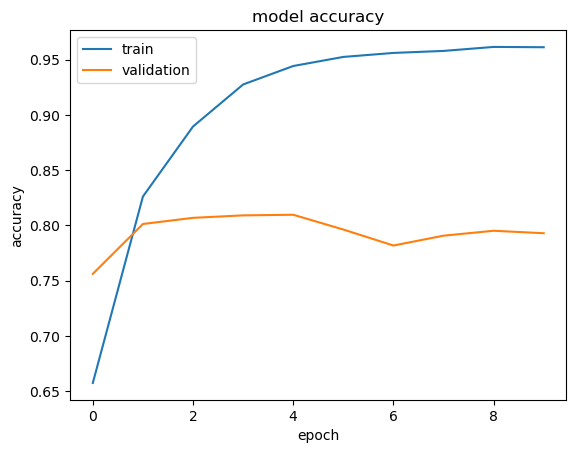

In [62]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [63]:
model.predict(train_data_vectors[:1])

1/1 [==============================] - 0s 78ms/step


array([[7.27366523e-06, 4.76426736e-04, 1.01771491e-06, 9.68286276e-01,
        1.42990062e-02, 1.96580658e-07, 3.63172035e-07, 6.87466866e-07,
        2.27843900e-03, 1.82955453e-04, 2.38926514e-04, 1.53283763e-03,
        9.91180350e-05, 1.70218816e-04, 4.89096819e-05, 2.57601750e-05,
        5.09349816e-03, 2.28852168e-05, 2.13329749e-05, 4.68440074e-03,
        1.75291428e-03, 2.39298213e-04, 4.41726916e-05, 4.02131900e-06,
        8.72897715e-07, 1.15286648e-05, 2.12712425e-08, 2.41781413e-06,
        9.48560410e-05, 3.07112496e-05, 1.18283075e-04, 3.18851635e-05,
        1.60754234e-06, 1.15365283e-05, 3.14453027e-05, 3.92225093e-06,
        4.70012747e-05, 8.30974258e-08, 3.61561688e-05, 4.07090811e-05,
        1.39298099e-05, 7.01507770e-06, 8.96410768e-08, 1.78718801e-06,
        3.99546209e-08, 3.20857430e-06]], dtype=float32)